# Data Preparation for Benchmark and Evaluation of Different Algorithms

In [1]:
import os
import sys
import feather
import warnings

import numpy as np # Numerical computing
import pandas as pd # Data manipulation

import seaborn as sns # R-like high-level plots
import matplotlib.pyplot as plt # Python's base plotting 
from matplotlib_venn import venn2 # For venn diagrams

sys.path.append('../')
from src import utils, plots

warnings.filterwarnings('ignore')

# Initialize the timer
startTime = utils.getTime()

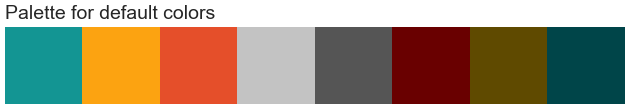

In [2]:
# Create a dictionary for a greyscale color palette with 9 colors
def_colors = [
    "#139593", "#fca311", "#e54f2a",
    "#c3c3c3", "#555555",
    "#690000", "#5f4a00", "#004549"
]

# Set seaborn style
sns.set_theme(
    style="white",
    context="paper",
    palette=def_colors,
    font_scale=1,
    rc={
        "figure.figsize": (6, 4),
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
    }
)

# Figure Saving Settings
figure_formats = ["png", "pdf"]
save_to_folder = True
transparet_bg = True
figure_dpi = 300

## Configure dataframe displaying
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

plots.color_palette(
    def_colors, 
    save=False
)

In [3]:
notebook_name = "1_preparation"
data_path = "./data/input/"
output_path = f"./data/prepared/"
figure_path = f"./figures/{notebook_name}/"

# Create the output folder if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Create figure folder structure, if needed
if save_to_folder:
    for i in figure_formats:
        cur_folder = figure_path + i + "/"
        if not os.path.exists(cur_folder):
            os.makedirs(cur_folder)

# Prepare Quant, Info and Meta Data

## Quantitative Data

### Open the Long Format Data

In [4]:
# Load the data (in long format)
dt = pd.read_csv(
    data_path + "site02_global_q_0.01_applied_to_local_global.txt", 
    sep="\t", 
    engine="pyarrow" # C engine is faster
)
utils.print_shape(dt, "Loaded Data in Long Format")
dt.head()

Loaded Data in Long Format data has 766,690 rows and 59 columns


,transition_group_id,peptide_group_label,run_id,filename,RT,id,Sequence,FullPeptideName,Charge,m/z,Intensity,ProteinName,...,xx_lda_prelim_score,xx_swath_prelim_score,aggr_Peak_Area,aggr_Peak_Apex,aggr_Fragment_Annotation,peak_group_rank,d_score,transition_group_id_m_score,transition_group_id_p_value,ProteinName_m_score,ProteinName_p_value,align_runid
0,101646_KVTAAMGK_2_run0,101646_KVTAAMGK_2,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,650.5499,f_14390269292232685520,KVTAAMGK,KVTAAMGK,-1,403.2337,41932.0000,1/P61353,...,8.8309,0,20022.000000;13230.000000;2887.000000;1956.000...,NA;NA;NA;NA;NA;NA,1556695_KVTAAMGK_2;1556698_KVTAAMGK_2;1556694_...,1,6.2098,0.0000,0.0000,0.0000,0.0000,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz
1,101689_KVTQLDLDGPK_3_run0,101689_KVTQLDLDGPK_3,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,2612.7214,f_10139194802640892275,KVTQLDLDGPK,KVTQLDLDGPK,-1,405.2311,57640.0000,1/Q13442,...,8.0825,0,18738.000000;9630.000000;11635.000000;9304.000...,NA;NA;NA;NA;NA;NA,1557376_KVTQLDLDGPK_3;1557372_KVTQLDLDGPK_3;15...,1,6.1719,0.0000,0.0000,0.0000,0.0000,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz
2,10255_ALGTLLHTNLR_3_run0,10255_ALGTLLHTNLR_3,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,4096.6353,f_1787316922634846856,ALGTLLHTNLR,ALGTLLHTNLR,-1,403.5752,15921.0000,1/Q04721,...,8.1305,0,7341.000000;2187.000000;3649.000000;1162.00000...,NA;NA;NA;NA;NA;NA,156828_ALGTLLHTNLR_3;156827_ALGTLLHTNLR_3;1568...,1,5.1366,0.0000,0.0000,0.0004,0.0003,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz
3,103094_LAHEDAEC(UniMod:4)EK_3_run0,103094_LAHEDAEC(UniMod:4)EK_3,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,631.3614,f_8898426420885968943,LAHEDAECEK,LAHEDAEC(UniMod:4)EK,-1,401.1766,4763.0000,1/Q9UG63,...,7.9384,0,1091.000000;1186.000000;674.000000;323.000000;...,NA;NA;NA;NA;NA;NA,1579315_LAHEDAEC(UniMod:4)EK_3;1579313_LAHEDAE...,1,4.3441,0.0000,0.0000,0.0038,0.0033,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz
4,103713_LAQFVAR_2_run0,103713_LAQFVAR_2,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,2425.2638,f_16495249845711536962,LAQFVAR,LAQFVAR,-1,402.7400,115001.0000,1/Q8IWX8,...,6.5837,0,32804.000000;24008.000000;18246.000000;18470.0...,NA;NA;NA;NA;NA;NA,1588849_LAQFVAR_2;1588847_LAQFVAR_2;1588851_LA...,1,4.5720,0.0000,0.0000,0.0021,0.0017,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz


### Initial Clean-up 

- Removing 1/ from ProteinName
- Remove iRT_proteins and AQUA proteins
- Create a simplified run name 
- Subset for Important Columns

In [5]:
rowN = dt.shape[0]
print("Remove 1/ from ProteinName and remove rows with ProteinName = iRT_protein and sp|AQUA30|AQUA30")
dt["ProteinName"] = dt["ProteinName"].str.replace("1/", "")
dt = dt[~dt["ProteinName"].isin(["iRT_protein", "sp|AQUA30|AQUA30"])]
print("     - Number of rows removed: ", rowN - dt.shape[0])
rowN = dt.shape[0] # Update row count

Remove 1/ from ProteinName and remove rows with ProteinName = iRT_protein and sp|AQUA30|AQUA30
     - Number of rows removed:  868


In [6]:
print("Create simplified 'run' name column")
dt["run"] = dt["run_id"].str.replace("Site2_AQUA_HEK_", "").str.replace("_180714.mzXML.gz", "")
# dt["day"] = [run.split('_')[2] for run in dt['run']]
utils.print_shape(dt, "Data after removing rows")
dt.head()

Create simplified 'run' name column
Data after removing rows data has 765,822 rows and 60 columns


,transition_group_id,peptide_group_label,run_id,filename,RT,id,Sequence,FullPeptideName,Charge,m/z,Intensity,ProteinName,...,xx_swath_prelim_score,aggr_Peak_Area,aggr_Peak_Apex,aggr_Fragment_Annotation,peak_group_rank,d_score,transition_group_id_m_score,transition_group_id_p_value,ProteinName_m_score,ProteinName_p_value,align_runid,run
0,101646_KVTAAMGK_2_run0,101646_KVTAAMGK_2,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,650.5499,f_14390269292232685520,KVTAAMGK,KVTAAMGK,-1,403.2337,41932.0000,P61353,...,0,20022.000000;13230.000000;2887.000000;1956.000...,NA;NA;NA;NA;NA;NA,1556695_KVTAAMGK_2;1556698_KVTAAMGK_2;1556694_...,1,6.2098,0.0000,0.0000,0.0000,0.0000,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,S1_SW_day1
1,101689_KVTQLDLDGPK_3_run0,101689_KVTQLDLDGPK_3,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,2612.7214,f_10139194802640892275,KVTQLDLDGPK,KVTQLDLDGPK,-1,405.2311,57640.0000,Q13442,...,0,18738.000000;9630.000000;11635.000000;9304.000...,NA;NA;NA;NA;NA;NA,1557376_KVTQLDLDGPK_3;1557372_KVTQLDLDGPK_3;15...,1,6.1719,0.0000,0.0000,0.0000,0.0000,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,S1_SW_day1
2,10255_ALGTLLHTNLR_3_run0,10255_ALGTLLHTNLR_3,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,4096.6353,f_1787316922634846856,ALGTLLHTNLR,ALGTLLHTNLR,-1,403.5752,15921.0000,Q04721,...,0,7341.000000;2187.000000;3649.000000;1162.00000...,NA;NA;NA;NA;NA;NA,156828_ALGTLLHTNLR_3;156827_ALGTLLHTNLR_3;1568...,1,5.1366,0.0000,0.0000,0.0004,0.0003,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,S1_SW_day1
3,103094_LAHEDAEC(UniMod:4)EK_3_run0,103094_LAHEDAEC(UniMod:4)EK_3,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,631.3614,f_8898426420885968943,LAHEDAECEK,LAHEDAEC(UniMod:4)EK,-1,401.1766,4763.0000,Q9UG63,...,0,1091.000000;1186.000000;674.000000;323.000000;...,NA;NA;NA;NA;NA;NA,1579315_LAHEDAEC(UniMod:4)EK_3;1579313_LAHEDAE...,1,4.3441,0.0000,0.0000,0.0038,0.0033,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,S1_SW_day1
4,103713_LAQFVAR_2_run0,103713_LAQFVAR_2,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,/scratch/97935361.tmpdir/Site2_AQUA_HEK_S1_SW_...,2425.2638,f_16495249845711536962,LAQFVAR,LAQFVAR,-1,402.7400,115001.0000,Q8IWX8,...,0,32804.000000;24008.000000;18246.000000;18470.0...,NA;NA;NA;NA;NA;NA,1588849_LAQFVAR_2;1588847_LAQFVAR_2;1588851_LA...,1,4.5720,0.0000,0.0000,0.0021,0.0017,Site2_AQUA_HEK_S1_SW_day1_180714.mzXML.gz,S1_SW_day1


In [7]:
print("Subset for important columns: ['run', 'ProteinName', 'FullPeptideName', 'peptide_group_label', 'Intensity'] ")
dt = dt[['run', 'ProteinName', 'FullPeptideName', 'peptide_group_label', 'Intensity']]

print("Aggregate the charge states (using sum)")
dt = dt.groupby(['run', 'ProteinName', 'FullPeptideName']).agg({'Intensity': 'sum'}).reset_index()
print("    - Number of rows aggregated: ", rowN - dt.shape[0])
rowN = dt.shape[0] # Update row count

utils.print_shape(dt, "Data after aggregating charge states")
dt.head()

Subset for important columns: ['run', 'ProteinName', 'FullPeptideName', 'peptide_group_label', 'Intensity'] 
Aggregate the charge states (using sum)
    - Number of rows aggregated:  91610
Data after aggregating charge states data has 674,212 rows and 4 columns


,run,ProteinName,FullPeptideName,Intensity
0,S1_SW_day1,A0AVT1,AC(UniMod:4)IGDTLC(UniMod:4)QK,25023.0000
1,S1_SW_day1,A0AVT1,AILSNEATK,13205.0000
2,S1_SW_day1,A0AVT1,DGSLFWQSPK,26861.0000
3,S1_SW_day1,A0AVT1,DPPEEEIPFC(UniMod:4)TLK,31876.0000
4,S1_SW_day1,A0AVT1,GMITVTDPDLIEK,69762.0000


### Move to Wide Format

In [8]:
print("Create wide format for further analysis")
dt_wide = dt.pivot_table(
    index=['ProteinName', 'FullPeptideName'], 
    columns='run', 
    values='Intensity',
    aggfunc='mean'
).reset_index()
rowN = dt_wide.shape[0]
utils.print_shape(dt_wide, "Data in Wide Format")
dt_wide.head()

Create wide format for further analysis
Data in Wide Format data has 33,636 rows and 23 columns


run,ProteinName,FullPeptideName,S1_SW_day1,S1_SW_day3,S1_SW_day5,S2_SW_day1,S2_SW_day3,S2_SW_day5,S3_SW_day1,S3_SW_day3,S3_SW_day5,S4_SW_day1_rep1,S4_SW_day1_rep2,S4_SW_day1_rep3,S4_SW_day3_rep1,S4_SW_day3_rep2,S4_SW_day3_rep3,S4_SW_day5_rep1,S4_SW_day5_rep2,S4_SW_day5_rep3,S5_SW_day1,S5_SW_day3,S5_SW_day5
0,A0AVT1,AC(UniMod:4)IGDTLC(UniMod:4)QK,25023.0000,35138.0000,41482.0000,21496.0000,31754.0000,35526.0000,23220.0000,36783.0000,37205.0000,25660.0000,21565.0000,33164.0000,41271.0000,38246.0000,39616.0000,40687.0000,43839.0000,39565.0000,34889.0000,41010.0000,49513.0000
1,A0AVT1,AILSNEATK,13205.0000,17564.0000,19310.0000,14437.0000,65874.0000,17356.0000,15350.0000,57172.0000,18546.0000,19410.0000,17600.0000,17749.0000,78842.0000,19439.0000,19067.0000,20519.0000,22297.0000,86035.0000,63015.0000,94152.0000,109614.0000
2,A0AVT1,DGSLFWQSPK,26861.0000,32576.0000,37706.0000,27775.0000,17379.0000,36998.0000,21825.0000,33690.0000,39462.0000,29603.0000,31603.0000,32305.0000,32264.0000,30297.0000,34159.0000,43117.0000,40865.0000,43193.0000,34933.0000,38235.0000,38305.0000
3,A0AVT1,DPPEEEIPFC(UniMod:4)TLK,31876.0000,33427.0000,55278.0000,36564.0000,35872.0000,51549.0000,32228.0000,36694.0000,53073.0000,38854.0000,39426.0000,45787.0000,40985.0000,44507.0000,39066.0000,60954.0000,60854.0000,59654.0000,44838.0000,37254.0000,62776.0000
4,A0AVT1,GMITVTDPDLIEK,69762.0000,84678.0000,130352.0000,75518.0000,90247.0000,126902.0000,81925.0000,NaN,91212.0000,97563.0000,79588.0000,126414.0000,77405.0000,NaN,25124.0000,118039.0000,132149.0000,91400.0000,NaN,55640.0000,72159.0000


### Keep Complete Quantified Peptides and Proteins with at least 4 Peptides

In [9]:
# Remove rows with missing values
print("Remove rows with missing values")
dt_wide = dt_wide[dt_wide.iloc[:, 2:].isna().sum(axis=1) == 0]
print("     - Number of rows removed: ", rowN - dt_wide.shape[0])
print()
rowN = dt_wide.shape[0] # Update row count
print("Subset to proteins with more than 4 peptides")
dt_wide = dt_wide.groupby('ProteinName').filter(lambda x: x.shape[0] > 4)
print("     - Number of rows removed: ", rowN - dt_wide.shape[0])
rowN = dt_wide.shape[0] # Update row count
# Set the proteinName and FullPeptideName as index
dt_wide.set_index(['ProteinName', 'FullPeptideName'], inplace=True)
utils.print_shape(dt_wide, "Data after removing missing values and filtering for proteins with more than 4 peptides")
dt_wide.head()

Remove rows with missing values
     - Number of rows removed:  7401

Subset to proteins with more than 4 peptides
     - Number of rows removed:  5520
Data after removing missing values and filtering for proteins with more than 4 peptides data has 20,715 rows and 21 columns


run                                         S1_SW_day1  S1_SW_day3  \
ProteinName FullPeptideName                                          
A0AVT1      AC(UniMod:4)IGDTLC(UniMod:4)QK  25023.0000  35138.0000   
            AILSNEATK                       13205.0000  17564.0000   
            DGSLFWQSPK                      26861.0000  32576.0000   
            DPPEEEIPFC(UniMod:4)TLK         31876.0000  33427.0000   
            LETGQFLTFR                      39439.0000  47153.0000   

run                                         S1_SW_day5  S2_SW_day1  \
ProteinName FullPeptideName                                          
A0AVT1      AC(UniMod:4)IGDTLC(UniMod:4)QK  41482.0000  21496.0000   
            AILSNEATK                       19310.0000  14437.0000   
            DGSLFWQSPK                      37706.0000  27775.0000   
            DPPEEEIPFC(UniMod:4)TLK         55278.0000  36564.0000   
            LETGQFLTFR                      70227.0000  41817.0000   

run                                         S2_SW_day3  S2_SW_day5  \
ProteinName FullPeptideName                                          
A0AVT1      AC(UniMod:4)IGDTLC(UniMod:4)QK  31754.0000  35526.0000   
            AILSNEATK                       65874.0000  17356.0000   
            DGSLFWQSPK                      17379.0000  36998.0000   
            DPPEEEIPFC(UniMod:4)TLK         35872.0000  51549.0000   
            LETGQFLTFR                      50201.0000  73874.0000   

run                                         S3_SW_day1  S3_SW_day3  \
ProteinName FullPeptideName                                          
A0AVT1      AC(UniMod:4)IGDTLC(UniMod:4)QK  23220.0000  36783.0000   
            AILSNEATK                       15350.0000  57172.0000   
            DGSLFWQSPK                      21825.0000  33690.0000   
            DPPEEEIPFC(UniMod:4)TLK         32228.0000  36694.0000   
            LETGQFLTFR                      37622.0000  45465.0000   

run                                         S3_SW_day5  S4_SW_day1_rep1  \
ProteinName FullPeptideName                                               
A0AVT1      AC(UniMod:4)IGDTLC(UniMod:4)QK  37205.0000       25660.0000   
            AILSNEATK                       18546.0000       19410.0000   
            DGSLFWQSPK                      39462.0000       29603.0000   
            DPPEEEIPFC(UniMod:4)TLK         53073.0000       38854.0000   
            LETGQFLTFR                      79711.0000       46892.0000   

run                                         S4_SW_day1_rep2  S4_SW_day1_rep3  \
ProteinName FullPeptideName                                                    
A0AVT1      AC(UniMod:4)IGDTLC(UniMod:4)QK       21565.0000       33164.0000   
            AILSNEATK                            17600.0000       17749.0000   
            DGSLFWQSPK                           31603.0000       32305.0000   
            DPPEEEIPFC(UniMod:4)TLK              39426.0000       45787.0000   
            LETGQFLTFR                           52542.0000       53806.0000   

run                                         S4_SW_day3_rep1  S4_SW_day3_rep2  \
ProteinName FullPeptideName                                                    
A0AVT1      AC(UniMod:4)IGDTLC(UniMod:4)QK       41271.0000       38246.0000   
            AILSNEATK                            78842.0000       19439.0000   
            DGSLFWQSPK                           32264.0000       30297.0000   
            DPPEEEIPFC(UniMod:4)TLK              40985.0000       44507.0000   
            LETGQFLTFR                           48613.0000       58905.0000   

run                                         S4_SW_day3_rep3  S4_SW_day5_rep1  \
ProteinName FullPeptideName                                                    
A0AVT1      AC(UniMod:4)IGDTLC(UniMod:4)QK       39616.0000       40687.0000   
            AILSNEATK                            19067.0000       20519.0000   
            DGSLFWQSPK                           34159.0000       43

## Metadata

In [10]:
# Create a metadata and day_run_dict for plotting
meta = dt_wide.columns.to_frame().reset_index(drop=True)
meta["SampleId"] = meta['run'].str.split("_").str[0]
meta["day"] = meta['run'].str.split("_").str[2]
meta["replicate"] = meta['run'].str.split("_").str[3]

# Create dictionary of day:run
day_run_dict = {
    day: meta[meta['day'] == day]['run'].to_list()
    for day in meta['day'].unique()
}

utils.print_shape(meta, "Metadata")
meta

Metadata data has 21 rows and 4 columns


,run,SampleId,day,replicate
0,S1_SW_day1,S1,day1,NaN
1,S1_SW_day3,S1,day3,NaN
2,S1_SW_day5,S1,day5,NaN
3,S2_SW_day1,S2,day1,NaN
4,S2_SW_day3,S2,day3,NaN
5,S2_SW_day5,S2,day5,NaN
6,S3_SW_day1,S3,day1,NaN
7,S3_SW_day3,S3,day3,NaN
8,S3_SW_day5,S3,day5,NaN
9,S4_SW_day1_rep1,S4,day1,rep1


## Peptide Info Data

### Create Protein-Peptide (with Mods) Data

In [11]:
info_data = dt_wide.index.to_frame().reset_index(drop=True)
dt_wide = dt_wide.reset_index(drop=True)
# Remove all paranthese and content within them
info_data["StrippedPeptide"] = info_data["FullPeptideName"].astype(str).str.replace(r"\([^)]*\)", "", regex=True)
utils.print_shape(info_data, "Info Data")
info_data.head()

Info Data data has 20,715 rows and 3 columns


,ProteinName,FullPeptideName,StrippedPeptide
0,A0AVT1,AC(UniMod:4)IGDTLC(UniMod:4)QK,ACIGDTLCQK
1,A0AVT1,AILSNEATK,AILSNEATK
2,A0AVT1,DGSLFWQSPK,DGSLFWQSPK
3,A0AVT1,DPPEEEIPFC(UniMod:4)TLK,DPPEEEIPFCTLK
4,A0AVT1,LETGQFLTFR,LETGQFLTFR


### Expand Peptide Info Data

#### Protein Fasta (2024_05_20 version)

In [12]:
fastaReference = utils.fasta_to_df(
    f"{data_path}reviewedHumanProteome-2024_05_20.fasta",
    fasta_ID="ID"
).drop(
    columns=["proteinDescription", "fastaId",  "reviewStatus", "isoformStatus"]
)

utils.print_shape(fastaReference, "Fasta Reference")
fastaReference.head()

Fasta Reference data has 20,405 rows and 6 columns


,entry,entryName,geneName,sequenceLength,molecularWeight_kDa,sequence
0,A0A024R1R8,TMA7B_HUMAN,TMA7B,64,7.0913,MSSHEGGKKKALKQPKKQAKEMDEEEKAFKQKQKEEQKKLEVLKAK...
1,A0A024RBG1,NUD4B_HUMAN,NUDT4B,181,20.4339,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...
2,A0A075B6H7,KV37_HUMAN,IGKV3-7,116,12.7833,MEAPAQLLFLLLLWLPDTTREIVMTQSPPTLSLSPGERVTLSCRAS...
3,A0A075B6H8,KVD42_HUMAN,IGKV1D-42,117,13.0138,MDMRVPAQLLGLLLLWLPGVRFDIQMTQSPSFLSASVGDRVSIICW...
4,A0A075B6H9,LV469_HUMAN,IGLV4-69,119,12.7731,MAWTPLLFLTLLLHCTGSLSQLVLTQSPSASASLGASVKLTCTLSS...


##### Check the Fasta Entry Match

Number of unique proteins in the fasta file: 20405
Number of unique proteins in the peptide data: 1834

Number of proteins not in the fasta file: 5
{'P30042', 'Q9NNW7', 'P08107', 'P62158', 'Q16881'}


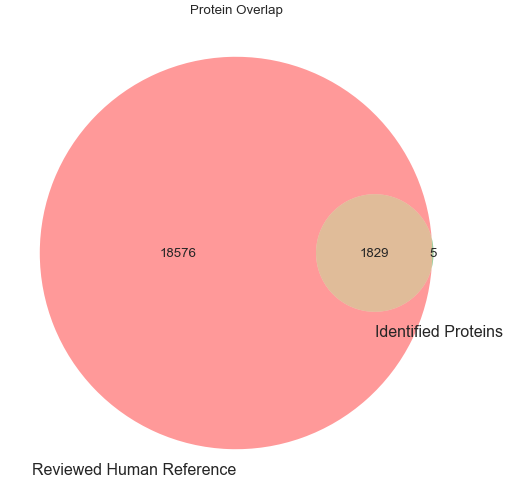

In [13]:
# Check the PG.ProteinGroups column and fasta entry
print("Number of unique proteins in the fasta file:", fastaReference["entry"].nunique())
print("Number of unique proteins in the peptide data:", info_data["ProteinName"].nunique())
# Create a venn diagram to show the overlap between the two datasets

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

venn2(
    subsets=(
        set(fastaReference["entry"].tolist()),
        set(info_data["ProteinName"].tolist())
    ),
    set_labels=("Reviewed Human Reference", "Identified Proteins"),
    ax=ax
)

plt.title("Protein Overlap")

# Save the figure
plots.save_figures(
    plt.gcf(),
    "ProteinOverlap_withFasta",
    figure_path,
    figure_formats,
    dpi=figure_dpi,
    transparent=transparet_bg,
)

print()
# Find the proteins not in the fasta file
not_in_fasta = set(info_data["ProteinName"].unique()) - set(fastaReference["entry"].unique())
print("Number of proteins not in the fasta file:", len(not_in_fasta))
print(not_in_fasta)

#### Remove the Non-Matching Proteins

In [14]:
# Remove the not in fasta proteins form info_data

info_data = info_data[
    ~info_data["ProteinName"].isin(not_in_fasta)
]
dt_wide = dt_wide.iloc[
    info_data.index
].reset_index(drop=True)

info_data = info_data.reset_index(drop=True)

if info_data.shape[0] == dt_wide.shape[0]:
    print("Peptide Data shapes match after modification")

Peptide Data shapes match after modification


#### Adding the Fasta Data to Peptide Info

In [15]:
info_data.columns = ["Protein", "Mod.Peptide", "Peptide"]
info_data = info_data.merge(
    fastaReference,
    left_on="Protein",
    right_on="entry",
    how="left"
)[[
    "Protein", "Mod.Peptide", "Peptide", 
    "entryName", "geneName", 
    "molecularWeight_kDa", 
    "sequence"
]]
info_data["molecularWeight_kDa"] = (info_data["molecularWeight_kDa"] / 1000).round(2)
utils.print_shape(info_data)
info_data.head()

 data has 20,670 rows and 7 columns


,Protein,Mod.Peptide,Peptide,entryName,geneName,molecularWeight_kDa,sequence
0,A0AVT1,AC(UniMod:4)IGDTLC(UniMod:4)QK,ACIGDTLCQK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...
1,A0AVT1,AILSNEATK,AILSNEATK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...
2,A0AVT1,DGSLFWQSPK,DGSLFWQSPK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...
3,A0AVT1,DPPEEEIPFC(UniMod:4)TLK,DPPEEEIPFCTLK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...
4,A0AVT1,LETGQFLTFR,LETGQFLTFR,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...


#### Add Peptide Start and End Positions on the Protein

In [16]:
# Find the start and end position of the peptides in the protein sequence
info_data["startpos"] = info_data.apply(
    lambda x: x["sequence"].find(x["Peptide"]),
    axis=1
) + 1
info_data["endpos"] = info_data["startpos"] + info_data["Peptide"].str.len()

# Non-matching peptides
nonMatchidx = info_data[info_data["startpos"] < 1].index
print("Number of non-matching peptides:", len(nonMatchidx))
print("Droping non-matching peptides...")
# Remove the non-matching peptides
info_data = info_data.drop(index=nonMatchidx).reset_index(drop=True)
dt_wide = dt_wide.drop(index=nonMatchidx).reset_index(drop=True)

utils.print_shape(info_data, "Info")
utils.print_shape(dt_wide, "Quant")

info_data["seqLength"] = info_data["sequence"].str.len()

print("Is same index?", info_data.shape[0] == dt_wide.shape[0])

# Sort the info data by Protein, Peptide start, and end positions
info_data = info_data.sort_values(["Protein", "startpos", "endpos"])
cur_idx = info_data.index
info_data = info_data.reset_index(drop=True)
dt_wide = dt_wide.iloc[cur_idx].reset_index(drop=True)
info_data.set_index("Protein", inplace=True)
info_data.head()

Number of non-matching peptides: 7
Droping non-matching peptides...
Info data has 20,663 rows and 9 columns
Quant data has 20,663 rows and 21 columns
Is same index? True


,Mod.Peptide,Peptide,entryName,geneName,molecularWeight_kDa,sequence,startpos,endpos,seqLength
Protein,,,,,,,,,
A0AVT1,YVLGDTAMQK,YVLGDTAMQK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,49,59,1052
A0AVT1,NLVLAGIK,NLVLAGIK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,79,87,1052
A0AVT1,LETGQFLTFR,LETGQFLTFR,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,239,249,1052
A0AVT1,TVFFESLER,TVFFESLER,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,296,305,1052
A0AVT1,AC(UniMod:4)IGDTLC(UniMod:4)QK,ACIGDTLCQK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,448,458,1052


## Add Protein Coverage and Peptide Trace Info for Plotting

In [17]:
# Unique proteins
unique_proteins = list(info_data.index.unique())

# Create a dictionary to store the protein coverage
protein_coverage = {}
protein_peptide_traces = {}
# Go over each protein and find the unique peptides
for protein in unique_proteins:
    # assign traces to non-overlapping peptides
    gap = 0
    trace_ends, traces = [-gap], []
    subset = info_data.loc[protein]
    trace_map = {}
    # If subset is not a DataFrame
    if not isinstance(subset, pd.DataFrame):
        # If only single peptide the peptide length is the coverage
        seqLen = subset["seqLength"]
        coverage_perc = (len(subset["Peptide"]) / seqLen) * 100
        trace_map = {subset["Peptide"] : 0}
    else:
        subset = subset.sort_values(["startpos", "endpos"], ascending=True).reset_index(drop=True)
        seqLen = subset["seqLength"].values[0]
        coverage = np.zeros(seqLen)
        for i in subset.itertuples():
            coverage[i.startpos:i.endpos] = 1
            traced = False
            for t in range(len(trace_ends)):
                if i.startpos >= trace_ends[t] + gap:
                    traces.append(t)
                    trace_ends[t] = i.endpos
                    traced = True
                    break
            if not traced:
                traces.append(len(trace_ends))
                trace_ends.append(i.endpos)
        # Calculate the coverage percentage
        coverage_perc = (coverage.sum() / seqLen) * 100
        # Create a trace map
        trace_map = dict(zip(subset["Peptide"], traces))
    
    protein_coverage[protein] = coverage_perc
    # Create protein-peptide traces dictionary
    protein_peptide_traces[protein] = trace_map

In [18]:
def dict_to_protein_peptide_df(data_dict):
    """
    Converts a nested dictionary of protein-peptide counts into a Pandas DataFrame with a single 'Trace' column.

    Args:
        data_dict: A dictionary where keys are protein IDs and values are dictionaries of peptide counts.

    Returns:
        pd.DataFrame: A DataFrame with 'Protein', 'Peptide', and 'Trace' columns.
    """

    rows = []
    for protein, peptide_counts in data_dict.items():
        for peptide, count in peptide_counts.items():
            row = {'Protein': protein, 'Peptide': peptide, 'Trace': count}
            rows.append(row)

    return pd.DataFrame(rows)

tmp = dict_to_protein_peptide_df(protein_peptide_traces)
tmp["Cov%"] = tmp["Protein"].map(protein_coverage)

idx = info_data.reset_index().set_index(["Protein", "Peptide"]).index
info_data["trace"] = idx.map(tmp.set_index(["Protein", "Peptide"])["Trace"])
info_data["Cov%"] = info_data.index.map(protein_coverage)

utils.print_shape(info_data)
info_data.head()

 data has 20,663 rows and 11 columns


,Mod.Peptide,Peptide,entryName,geneName,molecularWeight_kDa,sequence,startpos,endpos,seqLength,trace,Cov%
Protein,,,,,,,,,,,
A0AVT1,YVLGDTAMQK,YVLGDTAMQK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,49,59,1052,0,12.3574
A0AVT1,NLVLAGIK,NLVLAGIK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,79,87,1052,0,12.3574
A0AVT1,LETGQFLTFR,LETGQFLTFR,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,239,249,1052,0,12.3574
A0AVT1,TVFFESLER,TVFFESLER,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,296,305,1052,0,12.3574
A0AVT1,AC(UniMod:4)IGDTLC(UniMod:4)QK,ACIGDTLCQK,UBA6_HUMAN,UBA6,0.1200,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,448,458,1052,0,12.3574


# Visualize the Protein Coverage

**Protein Coverage:** The protein coverage is calculated by the number of amino acids in the protein that are covered by the identified peptides. The coverage is calculated as the number of amino acids covered divided by the total number of amino acids in the protein.

## Protein Length vs Peptide Count Scatterplot

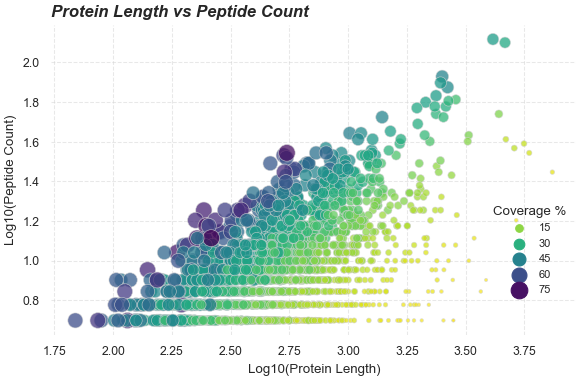

In [19]:
# Figure for protein length, peptide number, and coverage (scatter plot)
plot_data = info_data.groupby("Protein").agg(
    seqLength=("seqLength", "first"),
    PeptideCount=("Peptide", "count"),
    CovPerc=("Cov%", "first")
).reset_index()
plot_data["seqLength"] = np.log10(plot_data["seqLength"])
plot_data["PeptideCount"] = np.log10(plot_data["PeptideCount"])

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.scatterplot(
    ax=ax,
    data=plot_data,
    x="seqLength", 
    y="PeptideCount", 
    hue="CovPerc", 
    size="CovPerc",
    palette="viridis_r",
    sizes=(5, 150),
    alpha=0.75,
    edgecolor="lightgrey",
    linewidth=0.5,
    legend="brief",
)
ax.set_xlabel("Log10(Protein Length)")
ax.set_ylabel("Log10(Peptide Count)")
ax.set_title("Protein Length vs Peptide Count", fontsize=12, weight="bold", style="italic", loc="left")
ax.grid("both", linestyle="--", linewidth=0.75, alpha=0.5, color="lightgrey")
ax.legend(title="Coverage %", loc="upper right", bbox_to_anchor=(1., .45), fontsize=8, frameon=False)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plots.save_figures(
    plt.gcf(),
    "ProteinLength_vs_PeptideCount",
    figure_path,
    figure_formats,
    dpi=figure_dpi,
    transparent=transparet_bg,
)


## Protein Coverage Distribution

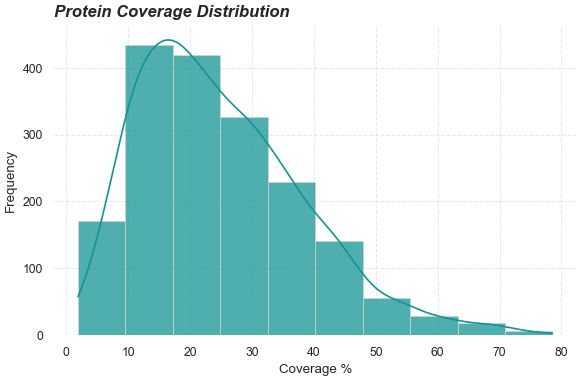

In [20]:
# Histogram of protein coverage
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(
    ax=ax,
    data=plot_data,
    x="CovPerc",
    bins=10,
    kde=True,
    color=def_colors[0],
    alpha=0.75,
    edgecolor="lightgrey",
    linewidth=0.5,
)
ax.set_xlabel("Coverage %")
ax.set_ylabel("Frequency")
ax.set_title("Protein Coverage Distribution", fontsize=12, weight="bold", style="italic", loc="left")
ax.grid("both", linestyle="--", linewidth=0.75, alpha=0.5, color="lightgrey")
sns.despine(left=True, bottom=True)
plt.tight_layout()

plots.save_figures(
    plt.gcf(),
    "ProteinCoverageDistribution",
    figure_path,
    figure_formats,
    dpi=figure_dpi,
    transparent=transparet_bg,
)

# Uniprot Annotation

In [21]:
# Process the uniprot file
uniprot_df = utils.preprocess_uniprot(
    "./data/input/uniprotkb_taxonomy_id_2759_AND_model_or_2024_05_25.txt"
)
sharedProts = list(set.intersection(set(info_data.index), set(uniprot_df["protein_id"])))
uniprot_df[uniprot_df["protein_id"].isin(sharedProts)].reset_index(drop=True)
utils.print_shape(uniprot_df, "Uniprot Data")
uniprot_df.head()

Uniprot Data data has 1,476,727 rows and 6 columns


,protein_id,feature,isoform_id,start,end,note
0,A0A024R1X5,DOMAIN,,105.0000,129.0000,Beclin-1 BH3
1,A0A024R1X5,DOMAIN,,135.0000,261.0000,Atg6/beclin coiled-coil
2,A0A024R1X5,DOMAIN,,264.0000,445.0000,Atg6 BARA
3,A0A024R1X5,REGION,,48.0000,72.0000,Disordered
4,A0A024R1X5,COILED,,145.0000,267.0000,


# Save The Cleaned Tables

In [22]:
if info_data.shape[0] == dt_wide.shape[0]:
    pd.concat(
        [info_data.reset_index(), dt_wide],
        axis=1
    ).to_feather(
        f"{output_path}SW_Benchmark_PeptideData.feather"
    )

uniprot_df.to_feather(f"{output_path}Uniprot_Annotation.feather")

meta.to_csv(
    f"{output_path}SW_Benchmark_Metadata.csv",
    index=False
)

In [23]:
print("Notebook Execution Time:", utils.prettyTimer(utils.getTime() - startTime))

Notebook Execution Time: 00h:00m:20s
